In [12]:
import numpy as np
import pandas as pd
import pickle
from tqdm import tqdm_notebook as tqdm
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
from draw_place import DrawPlace

In [13]:
db = pickle.load(open( "db.pkl", "rb" ))

In [14]:
placement_hist = pickle.load(open("plot_hist.pkl","rb"))

In [15]:
#db.num_physical_nodes + db.num_filler_nodes

In [16]:
#len(placement_hist)

In [17]:
id2name = {v: k for k, v in db.node_name2id_map.items()}

In [18]:
#len(db.node_name2id_map.items())

In [19]:
#db.num_physical_nodes,len(id2name)

In [20]:
# multithread
"""
placement_mat_x = np.stack([ph[0] for ph in placement_hist])
placement_mat_y = np.stack([ph[1] for ph in placement_hist])

def get_pl_df(placement_mat_x, placement_mat_y,i):
    #placement_df = pd.DataFrame(columns=['id','x','y'])
    placement_dict = {}
    if i < db.num_physical_nodes:
        id_col = id2name[i]
    else: 
        id_col = "f"+str(i)
    xpos = placement_mat_y[:,i] # cell i xpos over time
    ypos = placement_mat_x[:,i]
    placement_dict['id'] = id_col
    placement_dict['pos'] = np.concatenate([xpos,ypos],axis=1)
    #return pd.DataFrame.from_dict(placement_dict)
    return placement_dict
"""

'\nplacement_mat_x = np.stack([ph[0] for ph in placement_hist])\nplacement_mat_y = np.stack([ph[1] for ph in placement_hist])\n\ndef get_pl_df(placement_mat_x, placement_mat_y,i):\n    #placement_df = pd.DataFrame(columns=[\'id\',\'x\',\'y\'])\n    placement_dict = {}\n    if i < db.num_physical_nodes:\n        id_col = id2name[i]\n    else: \n        id_col = "f"+str(i)\n    xpos = placement_mat_y[:,i] # cell i xpos over time\n    ypos = placement_mat_x[:,i]\n    placement_dict[\'id\'] = id_col\n    placement_dict[\'pos\'] = np.concatenate([xpos,ypos],axis=1)\n    #return pd.DataFrame.from_dict(placement_dict)\n    return placement_dict\n'

In [21]:
#r = Parallel(n_jobs=-1, verbose=1, backend="threading")(delayed(get_pl_df)(placement_mat_x, placement_mat_y, i) for i in range(db.num_movable_nodes))

In [22]:
#%%time
#X = pd.concat([pd.DataFrame.from_dict(x) for x in r])
#X = pd.DataFrame(r)

In [23]:
#X.head()

In [24]:
TXY = [np.stack(placement_hist[i]).T for i in tqdm(range(len(placement_hist)))]

In [25]:
def split_nodes(i):
    return np.stack([TXY[j][i] for j in range(len(TXY))]).astype('float64')

In [26]:
#%%time
#traj_list = [X[X.id == c][["x", "y"]].values for c in tqdm(X['id'])]
#traj_list = Parallel(n_jobs=-1, verbose=1, backend="threading")(delayed(lambda i:X[X.id == i][["x", "y"]].values)(i) for i in X['id'])
traj_list = Parallel(n_jobs=-1, verbose=1, backend="threading")(delayed(split_nodes)(i) for i in range(TXY[0].shape[0]))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 11234 tasks  

In [27]:
import traj_dist.distance as tdist
import time
import seaborn as sns

In [28]:
"""
times = []
for i in range(100,601,100):
    ts = time.time()
    p_dist = tdist.pdist(traj_list[:i], metric="sspd")
    nb_dist = len(p_dist)
    te = time.time()
    print("%d Distances computed in %d seconds" % (nb_dist, te-ts))
    times.append(te-ts)
"""

'\ntimes = []\nfor i in range(100,601,100):\n    ts = time.time()\n    p_dist = tdist.pdist(traj_list[:i], metric="sspd")\n    nb_dist = len(p_dist)\n    te = time.time()\n    print("%d Distances computed in %d seconds" % (nb_dist, te-ts))\n    times.append(te-ts)\n'

In [29]:
#x = np.array(range(100,601,100))
#y = np.array(times)
#p = np.poly1d(np.polyfit(x,y, 3))

In [30]:
"""
import matplotlib.pyplot as plt
print(times)
xp = np.linspace(0, 300000, 100)
_ = plt.plot(x, y, '.', xp, p(xp))
plt.show()

for i in range(0,300000,1000):
    px = p(i)
    print(i,px,px/60,(px/60)/60, ((px/60)/60)/24)
"""

"\nimport matplotlib.pyplot as plt\nprint(times)\nxp = np.linspace(0, 300000, 100)\n_ = plt.plot(x, y, '.', xp, p(xp))\nplt.show()\n\nfor i in range(0,300000,1000):\n    px = p(i)\n    print(i,px,px/60,(px/60)/60, ((px/60)/60)/24)\n"

In [31]:
#import numpy as np
#traj_list = [np.array([1,2,3,4,5,6]), np.array([1,2,3,4,5,6])]
#tdist.pdist(traj_list[:100], metric="sspd")

In [32]:
X_d = np.stack([x.flatten() for x in tqdm(traj_list)])

In [37]:
import fastcluster
import hdbscan
from sklearn.cluster import KMeans

In [52]:
%%time
k_means = KMeans(100, n_jobs=-1).fit(X_d)

CPU times: user 6min 10s, sys: 1min 47s, total: 7min 57s
Wall time: 4min


In [53]:
np.unique(k_means.labels_, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
       dtype=int32),
 array([5422, 7787, 3596, 3946, 6594, 4461, 5547, 1334, 1058, 3708, 5104,
        7215,  376, 2320, 3527,  814,  965,  751, 5382, 7655,  483, 6309,
        1779, 1301, 1317, 2233,  141, 4383, 1344, 1203,  589, 2097,  999,
         319,  648, 1456,  551,  926, 2381, 4685, 1594, 1634, 6714, 1169,
        2722, 6067, 2169, 1021, 3573, 1718, 3349, 5074, 4759, 2008, 1156,
        1353, 2880, 3708, 3537,  521,  502,  667,  611,  215, 3456, 7512,
         499, 3198,  542, 2596,  646, 4379, 1445,  337, 3148, 6769,  491,
        4286

(array([11., 16., 10., 10.,  5.,  6.,  2.,  4.,  8.,  4.,  3.,  4.,  2.,
         3.,  1.,  2.,  3.,  2.,  1.,  3.]),
 array([  93. ,  477.7,  862.4, 1247.1, 1631.8, 2016.5, 2401.2, 2785.9,
        3170.6, 3555.3, 3940. , 4324.7, 4709.4, 5094.1, 5478.8, 5863.5,
        6248.2, 6632.9, 7017.6, 7402.3, 7787. ]),
 <a list of 20 Patch objects>)

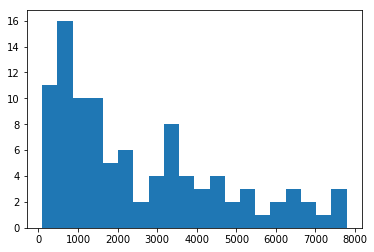

In [54]:
plt.hist(np.unique(k_means.labels_, return_counts=True)[1], bins=20)

In [ ]:
np.unique(k_means.labels_, return_counts=True)

In [23]:
clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
    gen_min_span_tree=False, leaf_size=40,
    metric='euclidean', min_cluster_size=500, min_samples=None, p=None, core_dist_n_jobs=-1)

In [24]:
%%time
clusterer.fit(X_d)

CPU times: user 1h 11min 11s, sys: 30.1 s, total: 1h 11min 41s
Wall time: 1h 12min 2s


HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_method='eom',
    core_dist_n_jobs=-1, gen_min_span_tree=False, leaf_size=40,
    match_reference_implementation=False, memory=Memory(location=None),
    metric='euclidean', min_cluster_size=500, min_samples=None, p=None,
    prediction_data=False)

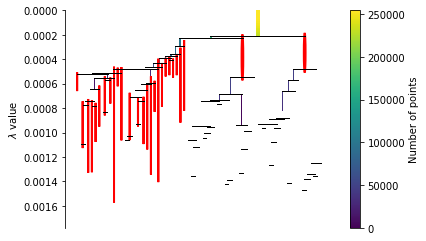

In [28]:
clusterer.condensed_tree_.plot(select_clusters=True,
                               selection_palette=sns.color_palette('deep', 8))

In [7]:
#np.savetxt('hdbscan_clusters.npy',clusterer.labels_)
Z = np.loadtxt('hdbscan_clusters.npy')

In [8]:
np.unique(Z,return_counts=True)

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.,
        12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.,
        25., 26.]),
 array([83861, 60008, 58272,  1264,  1708,   690,  1316,  1014,   788,
         1426,  1726,  2072,   601,  1133,  1295,  6429,  2288,  1110,
         1037,  1877,  4623,  1104,  1603,  1333,  1954,  6974,  4706,
         2245]))

In [48]:
from draw_place import DrawPlace
d = DrawPlace(db)
clust2col = [list(np.random.choice(range(256), size=3)/255) for _ in range(np.unique(k_means.labels_).shape[0])]

for i in tqdm(range(len(placement_hist))):
    d.forward(np.concatenate([placement_hist[i][0],placement_hist[i][1]]), (k_means.labels_).astype(np.int), clust2col, 'plots/plot_'+str(i)+str('.png'))

physical
macros design
macros plot
movable design
movable plot
[I] plotting to plots/plot_0.png takes 7.947 seconds
physical
macros design
macros plot
movable design
movable plot
[I] plotting to plots/plot_1.png takes 7.832 seconds
physical
macros design
macros plot
movable design
movable plot
[I] plotting to plots/plot_2.png takes 8.236 seconds
physical
macros design
macros plot
movable design
movable plot
[I] plotting to plots/plot_3.png takes 8.174 seconds
physical
macros design
macros plot
movable design
movable plot
[I] plotting to plots/plot_4.png takes 7.654 seconds
physical
macros design
macros plot
movable design
movable plot
[I] plotting to plots/plot_5.png takes 7.567 seconds
physical
macros design
macros plot
movable design
movable plot
[I] plotting to plots/plot_6.png takes 7.523 seconds
physical
macros design
macros plot
movable design
movable plot
[I] plotting to plots/plot_7.png takes 7.462 seconds
physical
macros design
macros plot
movable design
movable plot
[I] plott

In [ ]:
Z = fastcluster.linkage_vector(X_d, method='ward', metric='euclidean')   
np.savetxt("ward_linkage.npy", Z)

In [30]:
"""
times = []
for i in tqdm(range(100,10000,250)):
    ts = time.time()
    Z = fastcluster.linkage(X_d[:i,:], method='single', metric='euclidean', preserve_input=False)   
    te = time.time()
    print("%d Distances computed in %f seconds" % (i, te-ts))
    times.append(te-ts)
"""

100 Distances computed in 0.006095 seconds
350 Distances computed in 0.013019 seconds
600 Distances computed in 0.028256 seconds
850 Distances computed in 0.045068 seconds
1100 Distances computed in 0.076814 seconds
1350 Distances computed in 0.118492 seconds
1600 Distances computed in 0.166130 seconds
1850 Distances computed in 0.214877 seconds
2100 Distances computed in 0.288324 seconds
2350 Distances computed in 0.355535 seconds
2600 Distances computed in 0.436820 seconds
2850 Distances computed in 0.525655 seconds
3100 Distances computed in 0.624985 seconds
3350 Distances computed in 0.728931 seconds
3600 Distances computed in 0.844382 seconds
3850 Distances computed in 0.971413 seconds
4100 Distances computed in 1.096526 seconds
4350 Distances computed in 1.248842 seconds
4600 Distances computed in 1.400599 seconds
4850 Distances computed in 1.567790 seconds
5100 Distances computed in 1.799116 seconds
5350 Distances computed in 2.048871 seconds
5600 Distances computed in 2.582863 

[0.006095170974731445, 0.013019323348999023, 0.028255939483642578, 0.04506826400756836, 0.07681417465209961, 0.11849188804626465, 0.16612982749938965, 0.21487689018249512, 0.28832364082336426, 0.35553503036499023, 0.43682026863098145, 0.5256550312042236, 0.6249849796295166, 0.7289309501647949, 0.8443822860717773, 0.9714128971099854, 1.0965259075164795, 1.2488420009613037, 1.4005990028381348, 1.5677902698516846, 1.7991158962249756, 2.0488710403442383, 2.5828630924224854, 2.476152181625366, 2.6107680797576904, 2.7790517807006836, 2.988539218902588, 3.222148895263672, 3.4551172256469727, 3.71783709526062, 3.96294903755188, 4.2137181758880615, 4.4854936599731445, 4.765611886978149, 5.0532708168029785, 5.361398696899414, 5.6350860595703125, 6.23488712310791, 6.325927734375, 6.761849880218506]


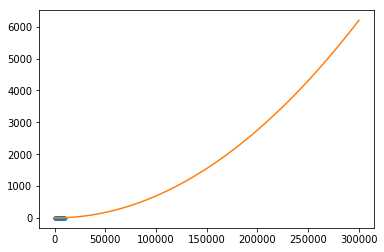

0 -0.01766635661591682 -0.00029443927693194696 -4.907321282199116e-06 -2.0447172009162982e-07
1000 0.05501136453987291 0.0009168560756645485 1.5280934594409143e-05 6.367056081003809e-07
2000 0.2655407942319107 0.004425679903865178 7.37613317310863e-05 3.0733888221285957e-06
3000 0.6139219324601964 0.01023203220766994 0.00017053387012783234 7.105577921993014e-06
4000 1.1001547792247304 0.018335912987078838 0.0003055985497846473 1.2733272907693638e-05
5000 1.7242393345255125 0.028737322242091873 0.00047895537070153125 1.9956473779230468e-05
6000 2.486175598362542 0.041436259972709034 0.0006906043328784839 2.8775180536603497e-05
7000 3.38596357073582 0.05643272617893034 0.0009405454363155056 3.918939317981274e-05
8000 4.423603251645346 0.07372672086075577 0.0012287786810125962 5.1199111708858176e-05
9000 5.599094641091121 0.09331824401818535 0.0015553040669697559 6.480433612373983e-05
10000 6.912437739073143 0.11520729565121905 0.0019201215941869842 8.000506642445768e-05
11000 8.363632545

130000 1165.3170134700765 19.421950224501277 0.3236991704083546 0.013487465433681442
131000 1183.3104133009447 19.72184022168241 0.32869733702804016 0.01369572237616834
132000 1201.441664840349 20.02402774733915 0.3337337957889858 0.013905574824541076
133000 1219.7107680882893 20.32851280147149 0.3388085466911915 0.014117022778799644
134000 1238.117723044766 20.635295384079434 0.34392158973465725 0.014330066238944053
135000 1256.662529709779 20.944375495162983 0.3490729249193831 0.014544705204974294
136000 1275.3451880833284 21.255753134722138 0.35426255224536896 0.014760939676890373
137000 1294.165698165414 21.569428302756897 0.35949047171261495 0.01497876965469229
138000 1313.1240599560356 21.885400999267258 0.364756683321121 0.015198195138380041
139000 1332.2202734551938 22.20367122425323 0.3700611870708872 0.015419216127953633
140000 1351.454338662888 22.5242389777148 0.3754039829619133 0.015641832623413055
141000 1370.8262555791187 22.847104259651978 0.3807850709941996 0.015866044

In [33]:
"""
plt.clf()
x = np.array(range(100,10000,250))
y = np.array(times)
p = np.poly1d(np.polyfit(x,y, 2))

import matplotlib.pyplot as plt
print(times)
xp = np.linspace(0, 300000, 100)
_ = plt.plot(x, y, '.', xp, p(xp))
plt.show()

for i in range(0,300000,1000):
    px = p(i)
    print(i,px,px/60,(px/60)/60, ((px/60)/60)/24)
"""

In [39]:
from collections import Counter
from scipy.cluster.hierarchy import dendrogram, fcluster
import numpy as np

In [36]:
Z = np.loadtxt("linkage.npy")

In [38]:
Z

array([[2.09232000e+05, 2.15689000e+05, 8.55362331e+00, 2.00000000e+00],
       [5.34780000e+04, 5.36120000e+04, 8.92222784e+00, 2.00000000e+00],
       [1.72733000e+05, 1.72734000e+05, 9.23162136e+00, 2.00000000e+00],
       ...,
       [2.29499000e+05, 5.08909000e+05, 1.19476147e+04, 2.54453000e+05],
       [4.02285000e+05, 5.08910000e+05, 1.22922947e+04, 2.54455000e+05],
       [5.08864000e+05, 5.08911000e+05, 1.27468570e+04, 2.54457000e+05]])

In [139]:
fclust = fcluster(Z,t=1, criterion='inconsistent', depth=2)

In [140]:
Counter(fclust)

Counter({57260: 21,
         98135: 1,
         57134: 4,
         57150: 10,
         57762: 2,
         52947: 1,
         54851: 8,
         64072: 19,
         55783: 16,
         57120: 6,
         54867: 6,
         55668: 4,
         55740: 7,
         54865: 2,
         57088: 2,
         1611: 12,
         57072: 5,
         53137: 1,
         57099: 1,
         57097: 2,
         52858: 3,
         64075: 2,
         64074: 2,
         57281: 1,
         57183: 2,
         57182: 2,
         56122: 11,
         57083: 8,
         57092: 13,
         2329: 3,
         55911: 7,
         55661: 5,
         893: 1,
         57154: 29,
         889: 2,
         57196: 1,
         62871: 2,
         97912: 1,
         63927: 2,
         53103: 8,
         64073: 2,
         52946: 1,
         2019: 4,
         57941: 15,
         52945: 1,
         57095: 2,
         57163: 2,
         57273: 1,
         2963: 2,
         57086: 7,
         2017: 4,
         57179: 1,
         561

In [31]:
fclust.shape

(254457,)

In [32]:
fclust.max()

13

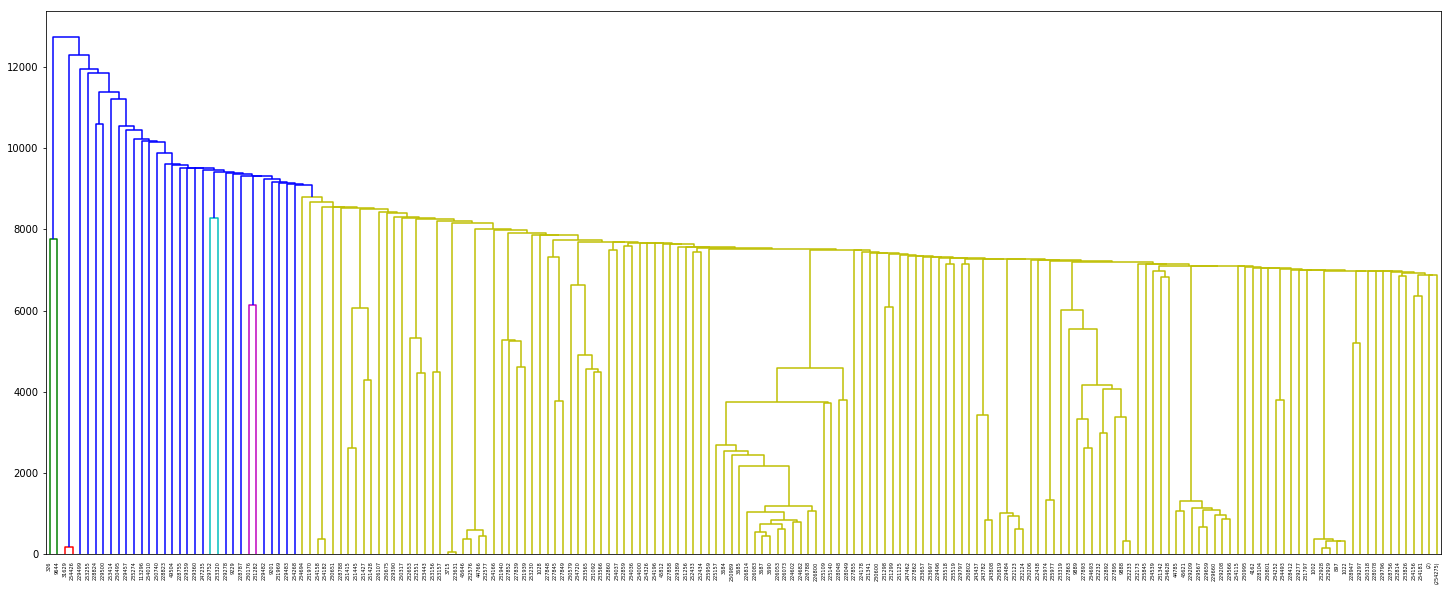

In [33]:
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z, p = 100, truncate_mode="level")
plt.show()

In [34]:
from draw_place import DrawPlace
d = DrawPlace(db)
d.forward(np.concatenate([placement_hist[-1][0],placement_hist[-1][1]]), Z, 'test.png')

physical
macros design
macros plot
movable design
movable plot
[I] plotting to test.png takes 9.522 seconds


1

In [20]:
print(np.concatenate([placement_hist[1][0],placement_hist[1][1]]))

[ 6816.58    9745.685   5702.601  ... 10380.678   5625.828   4802.1187]
